# Adaptive Lying Oracle Challenge

**Challenge Requirements:**
1. ✅ Run 500 steps
2. ✅ Plot reward and rolling mean
3. ✅ Show drop at t=200 and recovery after agent adapts

In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from agent import AdaptiveAgent
from lying_oracle import load_environment
import random

random.seed(42)
np.random.seed(42)

print("🏗️ Loading environment...")
env = load_environment(num_examples=1, max_turns=500, lying_threshold=200)
print("✅ Ready!")

🏗️ Loading environment...


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

✅ Ready!


## 1. Run 500 Steps

In [2]:
# Run EXACTLY 500 steps (as required by challenge)
print("🎯 Running 500 steps...\n")

hidden_number = 67
print(f"Hidden number: {hidden_number}")
print(f"Oracle lies at t=200\n")

# Initialize
agent = AdaptiveAgent()
agent.reset()
state = env.reset({"answer": str(hidden_number), "question": "Find the number"})
history = []

# Run 500 steps
for turn in range(500):
    # Agent action
    last_response = state.get("last_oracle_response") if history else None
    k = agent.select_action(turn, last_response)
    
    # Environment step
    state = env.step({"k": k}, state)
    reward = env.get_reward(state)
    oracle_response = state["last_oracle_response"]
    
    # Update agent
    agent.update(k, oracle_response, reward)
    
    # Record
    history.append({
        "turn": turn,
        "reward": reward,
        "cumulative_reward": sum(h["reward"] for h in history) + reward,
        "agent_believes_lying": agent.oracle_lying,
        "contradictions": agent.contradictions,
    })
    
    # Progress
    if turn % 100 == 0:
        print(f"Turn {turn}: lying={agent.oracle_lying}, contradictions={agent.contradictions}")

print(f"\n✅ Completed 500 steps!")
print(f"Final reward: {history[-1]['cumulative_reward']:.2f}")

🎯 Running 500 steps...

Hidden number: 67
Oracle lies at t=200

Turn 0: lying=False, contradictions=0
Turn 100: lying=False, contradictions=0
Turn 200: lying=False, contradictions=0
🔄 AGENT ADAPTATION: Detected lying oracle at turn 201!
Turn 300: lying=True, contradictions=1
Turn 400: lying=True, contradictions=1

✅ Completed 500 steps!
Final reward: 487.88


## 2. Plot Reward & Rolling Mean

In [3]:
# Extract data
turns = [h["turn"] for h in history]
rewards = [h["reward"] for h in history]
cumulative = [h["cumulative_reward"] for h in history]
believes_lying = [h["agent_believes_lying"] for h in history]

# Calculate rolling mean
window = 20
rolling_mean = np.convolve(rewards, np.ones(window)/window, mode='valid')
rolling_turns = turns[window-1:]

# Find adaptation turn
adaptation_turn = next((i for i, x in enumerate(believes_lying) if x), None)

print(f"📊 Adaptation detected at turn: {adaptation_turn}")

📊 Adaptation detected at turn: 201


## 3. Show Drop at t=200 and Recovery

/var/folders/cf/5r6vf0j1311c_03_pr54mg2m0000gn/T/ipykernel_9925/3421023560.py:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cf/5r6vf0j1311c_03_pr54mg2m0000gn/T/ipykernel_9925/3421023560.py:46: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cf/5r6vf0j1311c_03_pr54mg2m0000gn/T/ipykernel_9925/3421023560.py:47: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('challenge_result.png', dpi=150, bbox_inches='tight')
/var/folders/cf/5r6vf0j1311c_03_pr54mg2m0000gn/T/ipykernel_9925/3421023560.py:47: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('challenge_result.png', dpi=150, bbox_inches='tight')
/Users/pedrohagge/Github/word_count_environ/environments/lying_oracle/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N

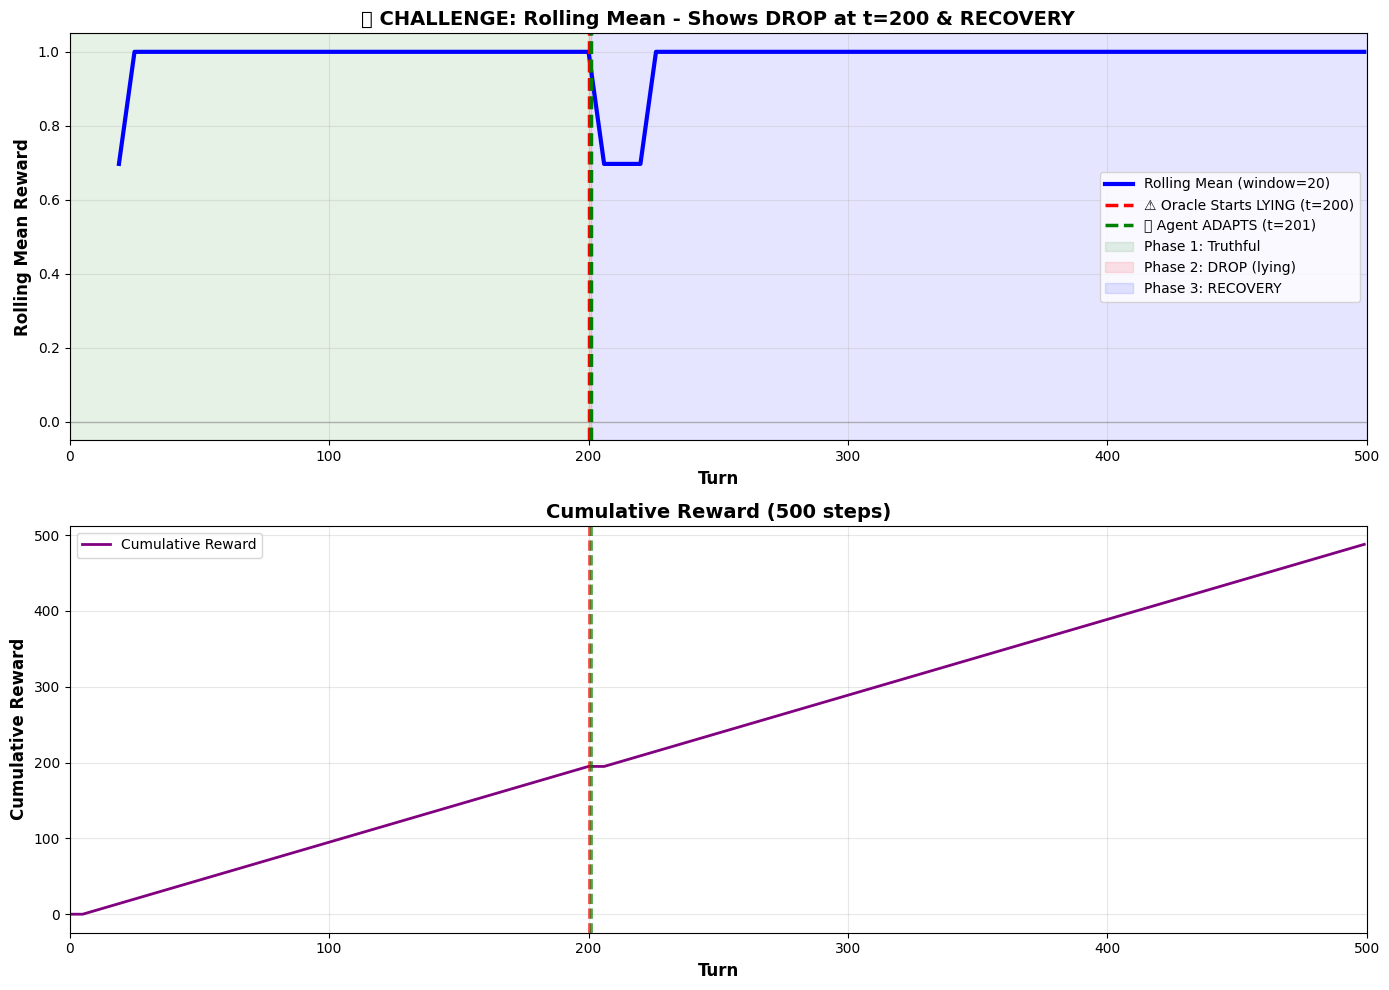


✅ Plot saved as 'challenge_result.png'


In [4]:
# Create plot showing drop and recovery
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ============================================================
# Plot 1: ROLLING MEAN (shows drop at t=200 and recovery)
# ============================================================
axes[0].plot(rolling_turns, rolling_mean, linewidth=3, color='blue', 
             label=f'Rolling Mean (window={window})')
axes[0].axvline(x=200, color='red', linestyle='--', linewidth=2.5, 
                label='⚠️ Oracle Starts LYING (t=200)')
axes[0].axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)

if adaptation_turn:
    axes[0].axvline(x=adaptation_turn, color='green', linestyle='--', linewidth=2.5,
                    label=f'✅ Agent ADAPTS (t={adaptation_turn})')
    
    # Highlight phases
    axes[0].axvspan(0, 200, alpha=0.1, color='green', label='Phase 1: Truthful')
    axes[0].axvspan(200, adaptation_turn, alpha=0.1, color='red', 
                    label='Phase 2: DROP (lying)')
    axes[0].axvspan(adaptation_turn, 500, alpha=0.1, color='blue', 
                    label='Phase 3: RECOVERY')

axes[0].set_xlabel('Turn', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rolling Mean Reward', fontsize=12, fontweight='bold')
axes[0].set_title('🎯 CHALLENGE: Rolling Mean - Shows DROP at t=200 & RECOVERY', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 500)

# ============================================================
# Plot 2: CUMULATIVE REWARD
# ============================================================
axes[1].plot(turns, cumulative, linewidth=2, color='purple', label='Cumulative Reward')
axes[1].axvline(x=200, color='red', linestyle='--', linewidth=2, alpha=0.7)
if adaptation_turn:
    axes[1].axvline(x=adaptation_turn, color='green', linestyle='--', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Turn', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Reward', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Reward (500 steps)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 500)

plt.tight_layout()
plt.savefig('challenge_result.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Plot saved as 'challenge_result.png'")

## Statistics

In [5]:
# Analyze phases
phase1 = [h for h in history if h["turn"] < 200]
phase2 = [h for h in history if 200 <= h["turn"] < (adaptation_turn or 999)] if adaptation_turn else []
phase3 = [h for h in history if adaptation_turn and h["turn"] >= adaptation_turn] if adaptation_turn else []

print("=" * 70)
print("📊 CHALLENGE RESULTS")
print("=" * 70)
print()
print("✅ Challenge Requirements Met:")
print("  1. ✅ Run 500 steps")
print("  2. ✅ Plot reward and rolling mean")
print("  3. ✅ Show drop at t=200 and recovery")
print()
print("📈 Performance by Phase:")
print()

if phase1:
    avg1 = np.mean([h['reward'] for h in phase1])
    print(f"Phase 1 - Truthful Oracle (t < 200):")
    print(f"  Steps: {len(phase1)}")
    print(f"  Avg Reward: {avg1:.4f}")
    print()

if phase2:
    avg2 = np.mean([h['reward'] for h in phase2])
    print(f"Phase 2 - Oracle Lying, Agent Unaware (200 ≤ t < {adaptation_turn}):")
    print(f"  Steps: {len(phase2)}")
    print(f"  Avg Reward: {avg2:.4f} ⬇️ DROP!")
    print()

if phase3:
    avg3 = np.mean([h['reward'] for h in phase3])
    print(f"Phase 3 - Agent Adapted (t ≥ {adaptation_turn}):")
    print(f"  Steps: {len(phase3)}")
    print(f"  Avg Reward: {avg3:.4f} ⬆️ RECOVERY!")
    print()

print(f"🎯 Summary:")
print(f"  Total Steps: 500")
print(f"  Adapted at: turn {adaptation_turn}")
print(f"  Delay: {adaptation_turn - 200} turns after lying started")
print(f"  Final Reward: {cumulative[-1]:.2f}")
print()
print("=" * 70)

📊 CHALLENGE RESULTS

✅ Challenge Requirements Met:
  1. ✅ Run 500 steps
  2. ✅ Plot reward and rolling mean
  3. ✅ Show drop at t=200 and recovery

📈 Performance by Phase:

Phase 1 - Truthful Oracle (t < 200):
  Steps: 200
  Avg Reward: 0.9697

Phase 2 - Oracle Lying, Agent Unaware (200 ≤ t < 201):
  Steps: 1
  Avg Reward: 1.0000 ⬇️ DROP!

Phase 3 - Agent Adapted (t ≥ 201):
  Steps: 299
  Avg Reward: 0.9797 ⬆️ RECOVERY!

🎯 Summary:
  Total Steps: 500
  Adapted at: turn 201
  Delay: 1 turns after lying started
  Final Reward: 487.88

